# Airline Delay Prediction

## 1. Context

### 1.1. Identifying the Data Source

The data source used in this project is the [Kaggle Dataset](https://www.kaggle.com/datasets/ulrikthygepedersen/airlines-delay) about airline delays. The dataset comes as a csv file and is stored in the `data` folder in the root of this repository. The dataset will be analyzed in the `Exploratory Data Analysis` section.

### 1.2. Data Acquisition

Information on how the data was acquired is not available. The dataset is available on Kaggle and was uploaded by [Ulrik Thyge Pedersen](https://www.kaggle.com/ulrikthygepedersen). As source only a link to [openml](https://www.openml.org/) is provided.

### 1.3. Problem statement and research questions

The dataset contains information about the departure time and length of flights, the airline, the origin and destination airports, a flight number and the information on whether a flight was delayed or not.

#### Research Question

How can we develop and compare the performance of various machine learning models to accurately predict flight delays, using factors such as departure time, flight length, airline, origin and destination airports, and flight number?

### 1.4. Goal

The goal of this project is to predict airline delays using the dataset and building different types of models and comparing them.

### 1.5. Approach and Methods

First we will analyze the dataset and perform some data cleaning. Then we will decide on what models to use and train them. Finally we will evaluate the models and compare them. We want to deploy a simple frontend where users can enter information about a flight and get a prediction on whether the flight will be delayed or not using the best model.


In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Explorative Datenanalyse (EDA)

In [2]:
#Loading the data
df = pd.read_csv('../data/airlines_delay.csv')
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


### Columns

Table with the columns and their description

| Column Name | Type | Description |
| --- | --- | --- |
| Flight | Categorical value | Flight number |
| Time | Numerical value | Time of the flight in minutes of the day|
| Length | Numerical value | Length of the flight in minutes | 
| Airline | Categorical value | Airline of the flight |
| AirportFrom | Categorical value | Airport from which the flight departs |
| AirportTo | Categorical value | Airport to which the flight arrives |
| DayOfWeek | Categorical value | Day of the week of the flight where 1 = Monday|
| Class | Categorical value | Indication whether the flight is delayed -> 1 is delayed, 0 is not delayed |


In [3]:
#Checking the info of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  float64
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 32.9+ MB


In [4]:
#Describing the dataset with different statistical measures
df.describe()

,Flight,Time,Length,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


In [5]:
#counting unique values in each column
df.nunique()

Flight         6585
Time           1131
Length          426
Airline          18
AirportFrom     293
AirportTo       293
DayOfWeek         7
Class             2
dtype: int64

In [6]:
#Show the max Length and the min Length
df['Length'].max(), df['Length'].min()

(655.0, 0.0)

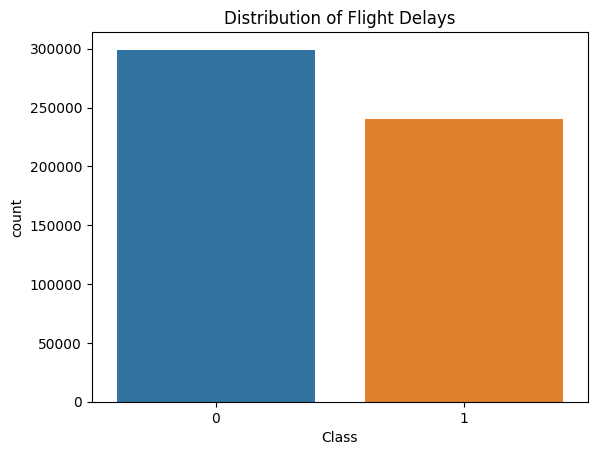

0    299118
1    240264
Name: Class, dtype: int64

In [7]:
#using seaborn to plot the distribution of the data

sns.countplot(x='Class', data=df)
plt.title('Distribution of Flight Delays')
plt.show()

#count the amount of delayed flights and not delayed flights
df['Class'].value_counts()


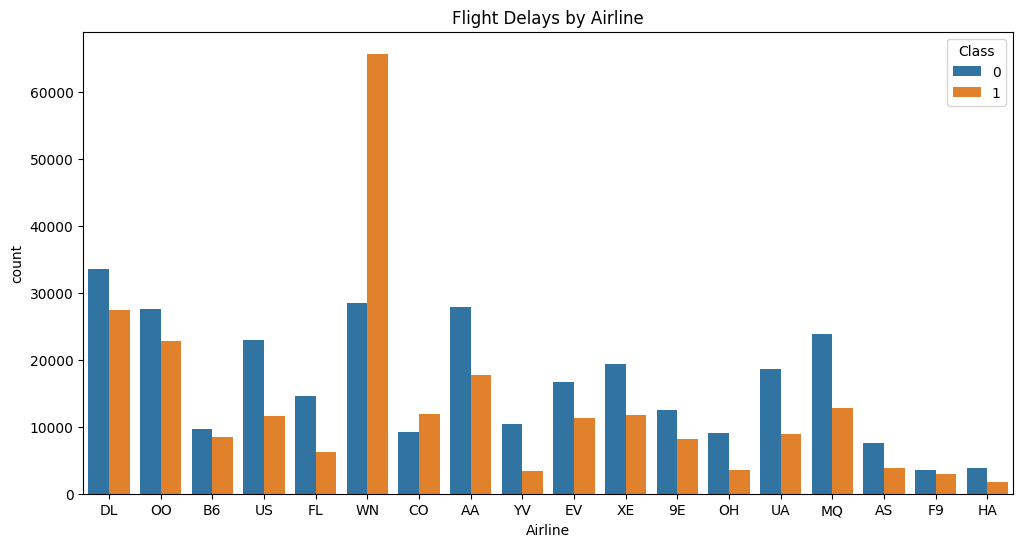

In [8]:
#plotting the delay by airline
plt.figure(figsize=(12, 6))
sns.countplot(x='Airline', hue='Class', data=df)
plt.title('Flight Delays by Airline')
plt.show()


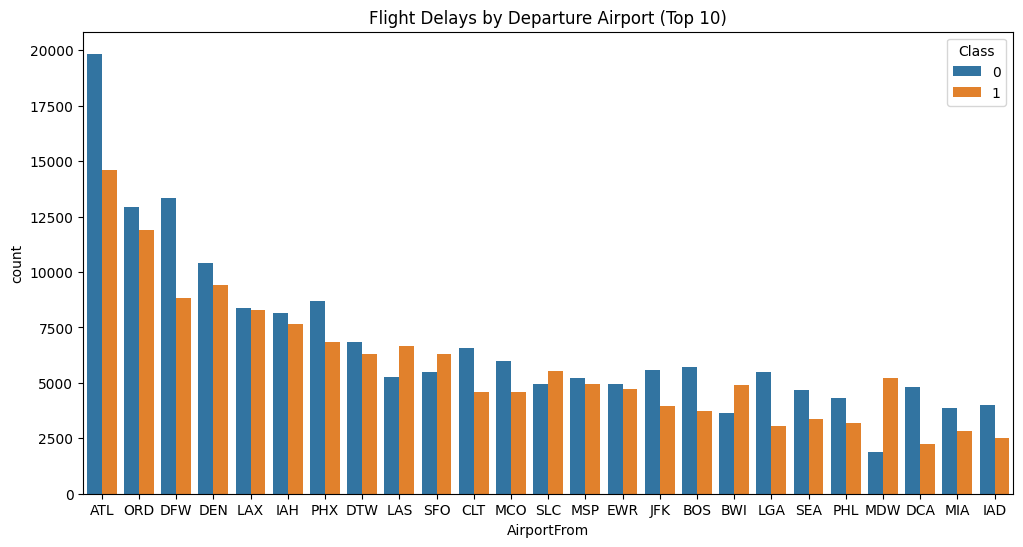

In [9]:
#plotting the delay by departure airport and only showing the top 25 because there are too many airports to show on the graph 
plt.figure(figsize=(12, 6))
sns.countplot(x='AirportFrom', hue='Class', data=df, order=df['AirportFrom'].value_counts().iloc[:25].index)
plt.title('Flight Delays by Departure Airport (Top 10)')
plt.show()




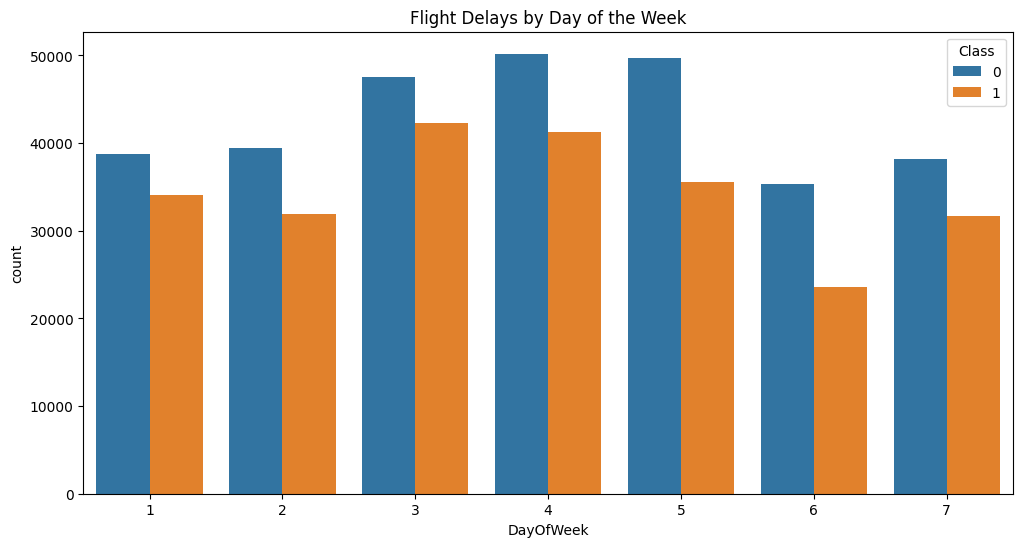

In [10]:
#Flight delays by day of the week
plt.figure(figsize=(12, 6))
sns.countplot(x='DayOfWeek', hue='Class', data=df)
plt.title('Flight Delays by Day of the Week')
plt.show()


<Axes: xlabel='Length'>

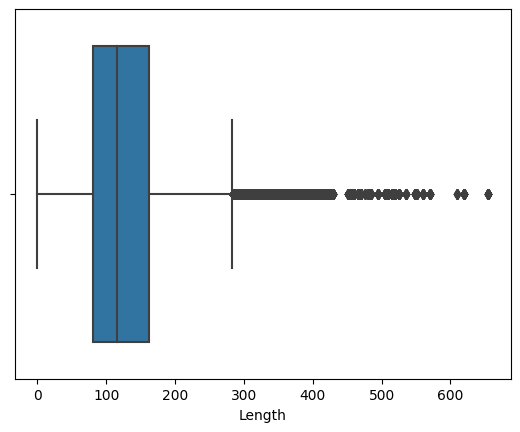

In [11]:
#identifiying and handling outliers
import seaborn as sns
sns.boxplot(x=df['Length'])

In [12]:
#count the number of rows where Length is smaller than 5
df[df['Length'] < 5].count()

Flight         4
Time           4
Length         4
Airline        4
AirportFrom    4
AirportTo      4
DayOfWeek      4
Class          4
dtype: int64

### TODO: Outliers besser beschreiben

## Unifying & Transformation

In [13]:
df.dtypes

Flight         float64
Time           float64
Length         float64
Airline         object
AirportFrom     object
AirportTo       object
DayOfWeek        int64
Class            int64
dtype: object

In [14]:
#change categorical columns to be a category data type
cols_to_convert = [col for col in df.columns if col not in ['Time', 'Length', 'Class']]
df[cols_to_convert] = df[cols_to_convert].astype('category')

df.dtypes


Flight         category
Time            float64
Length          float64
Airline        category
AirportFrom    category
AirportTo      category
DayOfWeek      category
Class             int64
dtype: object

In [15]:
#rename column  from Class to Delayed
df.rename(columns={'Class':'Delayed'}, inplace=True)

In [16]:
#set Flight column as index
df.set_index('Flight', inplace=True)

In [17]:
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Delayed
Flight,,,,,,,
2313.0,1296.0,141.0,DL,ATL,HOU,1,0
6948.0,360.0,146.0,OO,COS,ORD,4,0
1247.0,1170.0,143.0,B6,BOS,CLT,3,0
31.0,1410.0,344.0,US,OGG,PHX,6,0
563.0,692.0,98.0,FL,BMI,ATL,4,0


## Data Cleansing

In [18]:
#amount of isnull values in each column
df.isnull().sum()


Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Delayed        0
dtype: int64

In [19]:
#drop all rows with missing values
df.dropna(inplace=True)


In [20]:
#handling duplicate rows
df.drop_duplicates(inplace=True)

In [21]:
#count the number of rows 
df.shape   

(315753, 7)

In [22]:
#We've seen the outliers in the Length column, let's remove them

#Handling outliers and removing the first 0.25 and last 0.25 quantile
q1 = df['Length'].quantile(0.25) #first quantile
q3 = df['Length'].quantile(0.75) #last quantile
iqr = q3 - q1
df = df[(df['Length'] > (q1 - 1.5 * iqr)) & (df['Length'] < (q3 + 1.5 * iqr))] #remove outliers

df.shape


(300193, 7)

In [23]:
#count the number of rows where Length is smaller than 5
df[df['Length'] < 5].count()




Time           4
Length         4
Airline        4
AirportFrom    4
AirportTo      4
DayOfWeek      4
Delayed        4
dtype: int64

In [24]:
#drop all rows where Length is smaller than 5
df = df[df['Length'] > 5]


<Axes: xlabel='Length'>

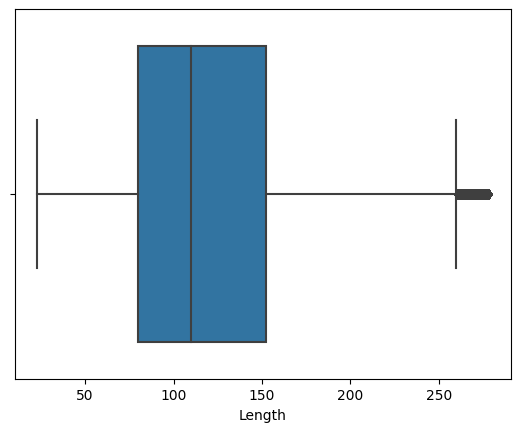

In [25]:
#show change of outliers after removing them
sns.boxplot(x=df['Length'])


In [26]:
#Show the max Length and the min Length after removing outliers
df['Length'].max(), df['Length'].min()

(278.0, 23.0)

In [27]:
# Save the cleaned data to a new csv file
df.to_csv('../data/airlines_delay_cleaned.csv', index=False)